<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/Computer_Vision_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
!pip install tqdm

In [313]:
from timeit import default_timer
from tqdm.auto import tqdm
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu121
0.16.0+cu121


In [314]:
train_data = datasets.CIFAR10(
  root="data",
  train=True,
  download="True",
  transform=ToTensor(),
  target_transform=None
)

Files already downloaded and verified


In [315]:
test_data = datasets.CIFAR10(
  root="data",
  train=False,
  download="True",
  transform=ToTensor(),
  target_transform=None
)

Files already downloaded and verified


In [316]:
len(train_data), len(test_data)

(50000, 10000)

In [317]:
image, label = train_data[0]
image, label

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [318]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [319]:
classes_to_idx = train_data.class_to_idx
classes_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [320]:
NUM_CLASSES = len(train_data.classes)

In [321]:
NUM_CLASSES

10

In [322]:
image.shape, label

(torch.Size([3, 32, 32]), 6)

Text(0.5, 1.0, 'frog')

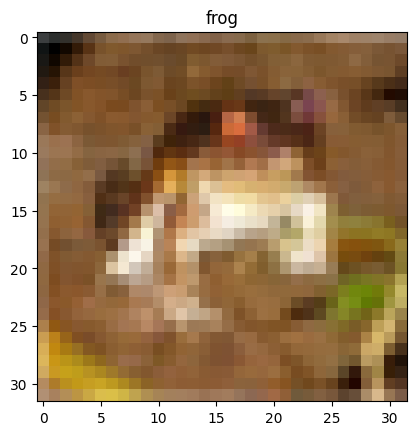

In [323]:
image, label = train_data[0]
image = image.squeeze(dim=1)
image = image.numpy()
image = image.transpose((1,2,0))
plt.imshow(image)
plt.title(classes[label])

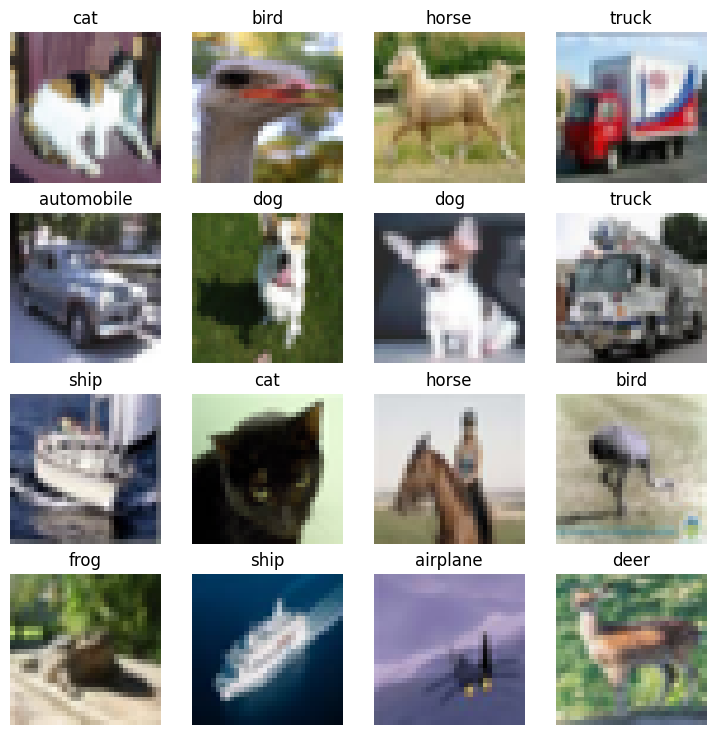

In [324]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[rand_idx]
  image = image.squeeze(dim=1)
  image = image.numpy()
  image = image.transpose((1,2,0))
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze())
  plt.title(classes[label])
  plt.axis(False)

In [325]:
BATCH_SIZE=32

In [326]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [327]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c98410a2fe0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c98410a3ca0>)

In [328]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c98410a2fe0>, <torch.utils.data.dataloader.DataLoader object at 0x7c98410a3ca0>)
Length of train_dataloader: 1563 batches of 32
Length of test_dataloader: 313 batches of 32


In [329]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape
train_features_batch[0], train_labels_batch[0]

(tensor([[[0.7373, 0.7451, 0.7686,  ..., 0.1569, 0.0000, 0.0039],
          [0.3922, 0.4039, 0.4196,  ..., 0.2118, 0.0000, 0.0039],
          [0.2000, 0.1922, 0.1922,  ..., 0.2549, 0.0000, 0.0039],
          ...,
          [0.2941, 0.5373, 0.4353,  ..., 0.6902, 0.7843, 0.7608],
          [0.3882, 0.4000, 0.3529,  ..., 0.8275, 0.7569, 0.7412],
          [0.3608, 0.3490, 0.3608,  ..., 0.7137, 0.7686, 0.6941]],
 
         [[0.6275, 0.6314, 0.6431,  ..., 0.2157, 0.2118, 0.1922],
          [0.3529, 0.3529, 0.3608,  ..., 0.2627, 0.1882, 0.1765],
          [0.2275, 0.2078, 0.1961,  ..., 0.3176, 0.1608, 0.1765],
          ...,
          [0.3059, 0.5451, 0.4392,  ..., 0.6941, 0.7608, 0.7333],
          [0.3490, 0.3569, 0.3059,  ..., 0.7608, 0.7098, 0.7216],
          [0.2941, 0.2824, 0.2941,  ..., 0.5255, 0.6902, 0.6784]],
 
         [[0.1059, 0.0941, 0.0902,  ..., 0.5333, 0.5529, 0.5412],
          [0.2353, 0.2235, 0.2157,  ..., 0.5843, 0.5725, 0.5647],
          [0.2000, 0.1765, 0.1608,  ...,

Image Size; (32, 32, 3)
Label: 2, label size torch.Size([])


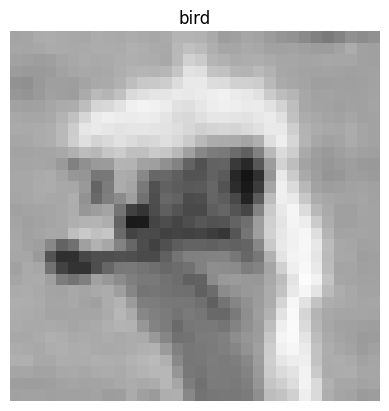

In [330]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
image = image.squeeze(dim=1)
image = image.numpy()
image = image.transpose((1,2,0))
plt.imshow(image)
plt.title(classes[label])
plt.axis(False)
print(f"Image Size; {image.shape}")
print(f"Label: {label}, label size {label.shape}")


In [331]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
x, x.shape

(tensor([[[0.7373, 0.7451, 0.7686,  ..., 0.1569, 0.0000, 0.0039],
          [0.3922, 0.4039, 0.4196,  ..., 0.2118, 0.0000, 0.0039],
          [0.2000, 0.1922, 0.1922,  ..., 0.2549, 0.0000, 0.0039],
          ...,
          [0.2941, 0.5373, 0.4353,  ..., 0.6902, 0.7843, 0.7608],
          [0.3882, 0.4000, 0.3529,  ..., 0.8275, 0.7569, 0.7412],
          [0.3608, 0.3490, 0.3608,  ..., 0.7137, 0.7686, 0.6941]],
 
         [[0.6275, 0.6314, 0.6431,  ..., 0.2157, 0.2118, 0.1922],
          [0.3529, 0.3529, 0.3608,  ..., 0.2627, 0.1882, 0.1765],
          [0.2275, 0.2078, 0.1961,  ..., 0.3176, 0.1608, 0.1765],
          ...,
          [0.3059, 0.5451, 0.4392,  ..., 0.6941, 0.7608, 0.7333],
          [0.3490, 0.3569, 0.3059,  ..., 0.7608, 0.7098, 0.7216],
          [0.2941, 0.2824, 0.2941,  ..., 0.5255, 0.6902, 0.6784]],
 
         [[0.1059, 0.0941, 0.0902,  ..., 0.5333, 0.5529, 0.5412],
          [0.2353, 0.2235, 0.2157,  ..., 0.5843, 0.5725, 0.5647],
          [0.2000, 0.1765, 0.1608,  ...,

In [332]:
output = flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([3, 32, 32])
Shape after flattening: torch.Size([3, 1024])


In [333]:
class baseline_cifar10(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )
  def forward(self, x):
    return self.layer_stack(x)

In [334]:
baseline = baseline_cifar10(
    input_shape=1024,
    hidden_units=128,
    output_shape=len(classes)
)
baseline

baseline_cifar10(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [335]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=baseline.parameters(), lr=0.01)


In [336]:
def Accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [337]:
def print_training_time(
    start: float,
    end: float,
    device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")

In [338]:
epochs = 1000
BATCH_SIZE=32
NUM_CLASSES = len(train_data.classes)

In [339]:
train_time_start = default_timer()

In [340]:
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    baseline.train()
    y_pred = baseline(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    oprimizer.step()

    if batch % 100 == 0:
      print(f"Processed {batch * len(X)}/{len(train_data_loader.dataset)} samples")

  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = baseline(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc = Accuracy(y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc  /= len(test_dataloader)

  print(f"Train Loss: {loss: .4f} | Test Accuracy: {test_acc: .2f}%, Test Loss: {test_loss: .4f}")
train_time_end = default_timer()
total_time = print_training_time(start=train_time_start, end=train_time_end, device=str(next(baseline.parameters()).device))

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 0


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x3072 and 1024x128)